In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from gammapy.data import EventList

In [4]:
events_ref = EventList.read('2fhl_events.fits.gz')

In [5]:
events = EventList.read('fermi_2fhl_events.fits')

In [14]:
print('Number of events in reference: {}'.format(len(events_ref)))
print('Number of events in: {}'.format(len(events)))

Number of events in reference: 60978
Number of events in: 60275


# Check min. and max. values

In [6]:
for column in events.colnames:
    check = np.allclose(events[column].min(), events_ref[column].min())
    label = 'OK!' if check else 'Not OK!'
    print("Checking minimum for {0:19s}: {1}".format(column, label))

Checking minimum for ENERGY             : OK!
Checking minimum for RA                 : OK!
Checking minimum for DEC                : OK!
Checking minimum for L                  : OK!
Checking minimum for B                  : OK!
Checking minimum for THETA              : OK!
Checking minimum for PHI                : OK!
Checking minimum for ZENITH_ANGLE       : OK!
Checking minimum for EARTH_AZIMUTH_ANGLE: OK!
Checking minimum for TIME               : OK!
Checking minimum for EVENT_ID           : OK!
Checking minimum for RUN_ID             : OK!
Checking minimum for RECON_VERSION      : OK!
Checking minimum for CALIB_VERSION      : OK!
Checking minimum for EVENT_CLASS        : OK!
Checking minimum for EVENT_TYPE         : OK!
Checking minimum for CONVERSION_TYPE    : OK!
Checking minimum for LIVETIME           : OK!
Checking minimum for DIFRSP0            : OK!
Checking minimum for DIFRSP1            : Not OK!
Checking minimum for DIFRSP2            : OK!
Checking minimum for DIFRSP3  

In [7]:
for column in events.colnames:
    check = np.allclose(events[column].max(), events_ref[column].max())
    label = 'OK!' if check else 'Not OK!'
    print("Checking maximum for {0:19s}: {1}".format(column, label))

Checking maximum for ENERGY             : OK!
Checking maximum for RA                 : OK!
Checking maximum for DEC                : OK!
Checking maximum for L                  : OK!
Checking maximum for B                  : OK!
Checking maximum for THETA              : OK!
Checking maximum for PHI                : OK!
Checking maximum for ZENITH_ANGLE       : OK!
Checking maximum for EARTH_AZIMUTH_ANGLE: OK!
Checking maximum for TIME               : OK!
Checking maximum for EVENT_ID           : OK!
Checking maximum for RUN_ID             : OK!
Checking maximum for RECON_VERSION      : OK!
Checking maximum for CALIB_VERSION      : OK!
Checking maximum for EVENT_CLASS        : OK!
Checking maximum for EVENT_TYPE         : OK!
Checking maximum for CONVERSION_TYPE    : OK!
Checking maximum for LIVETIME           : OK!
Checking maximum for DIFRSP0            : Not OK!
Checking maximum for DIFRSP1            : Not OK!
Checking maximum for DIFRSP2            : OK!
Checking maximum for DIFRS

# Time distribution
Checking the distribution of event times, quickly shows, that the difference is limited to a certain period in time:

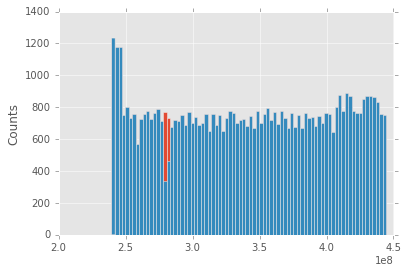

In [86]:
name = 'TIME'
data_ref, bins, _ = plt.hist(events_ref[name], bins=80)
data, bins, _ = plt.hist(events[name], bins=80)
plt.ylabel('Counts')

In [101]:
from astropy.table import Table, QTable
from astropy.io import fits

In [102]:
t = QTable.read('/home/hfm/adonath/Downloads/diff_flux_points.fits')

In [105]:
hdu_list = fits.open('/home/hfm/adonath/Downloads/int_flux_points.fits')

In [106]:
hdu_list[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                   24 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'E_MIN   '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'E_MAX   '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'FLUX    '        